<a href="https://colab.research.google.com/github/yebiny/SkillTreePython-DeepLearning/blob/main/01.%EB%94%A5%EB%9F%AC%EB%8B%9Dwith%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0-basic/%ED%95%B4%EC%84%A4/ch01_04_DNN%EA%B8%B0%EC%B4%88_%EC%9D%B4%EC%A7%84%EB%B6%84%EB%A5%98%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch01.04 DNN기초 - 이진분류 모델


---
* 날짜:
* 이름:

## 학습내용
    - 딥러닝을 이용한 이진분류 모델 구현
    - 적절한 손실함수와 최적화 함수 정의
    - 평가 및 예측

## 학습자료

* 모두의딥러닝 11장, 13장
* 데이터
  * `sornar.csv`
  * `pima-indians-diabetes.csv`


```
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
seed=1
np.random.seed(seed)
tf.random.set_seed(seed)
```

```
https://github.com/yebiny/SkillTreePython-DeepLearning.git
```

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
seed=1
np.random.seed(seed)
tf.random.set_seed(seed)

In [2]:
! git clone https://github.com/yebiny/SkillTreePython-DeepLearning.git

Cloning into 'SkillTreePython-DeepLearning'...
remote: Enumerating objects: 292, done.
remote: Counting objects: 100% (114/114), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 292 (delta 77), reused 43 (delta 43), pack-reused 178
Receiving objects: 100% (292/292), 21.99 MiB | 23.41 MiB/s, done.
Resolving deltas: 100% (112/112), done.


## 소나 데이터 광물 예측
---

> 1988년 존스홉킨스 대학교의 세즈노프스키(Sejnowski) 교수는 광석과 일반 돌을 가져다 놓고 음파 탐지기를 쏜 후 그 결과를 데이터를 정리했습니다. 신경망이 광석과 돌을 얼마나 잘 구분하는지 알아보도록 합시다.

```
- 0~59 : 음파 탐지기를 이용해 얻은 값
- 60: 광석 구분 {R, M}
```
<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0104-01.PNG?raw=true width=450>
</p>




### | 데이터 준비

#### **데이터 로드**
* `sonar.csv`

In [4]:
data_path = '/content/SkillTreePython-DeepLearning/dataset/sonar.csv'
df = pd.read_csv(data_path, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


#### **데이터 전처리**

In [9]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

def path2data_sonar(path, seed=1):
  # 데이터 적절히 불러오기
  df = pd.read_csv(data_path,
                   header=None, # 첫번째 행이 데이터(컬럼이 없음)
                   )
  # x-y 분할
  x = df.values[:, :-1] # 모든행(샘플), 0부터59까지 열(속성)
  y = df.values[:, -1] # 모든행(샘플), 60번째 열(속성)

  # 정규화 (x의 모든속성, y는 하지 않음)
  scaler = StandardScaler()
  x = scaler.fit_transform(x)
  
  # 라벨링 (y 라벨링, x는 하지 않음)
  labeling = LabelEncoder()
  y = labeling.fit_transform(y)

  # train-test 데이터 분할
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, 
                                                      random_state=seed, 
                                                      stratify=y ) # train-test 분할 시 클래스 비율 비슷하게 유지
  return x_train, x_test, y_train, y_test

data_path = '/content/SkillTreePython-DeepLearning/dataset/sonar.csv'
x_train, x_test, y_train, y_test = path2data_sonar(data_path)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
print(x_train[1], y_train[1])

(145, 60) (63, 60) (145,) (63,)
[-0.73091423  0.14791278  0.43217734 -0.193733   -0.27973353 -1.17141213
 -1.11368502 -1.1830759  -0.61643936  0.02789771 -0.54396541 -0.43025161
  0.20832115 -0.57696915 -1.27359777 -0.60100177 -0.1911599  -0.2737382
  0.34226731  0.25514539 -0.11259861 -0.65372658 -0.80968198 -1.27254722
 -0.12615184  0.8203173   0.79833763 -0.82844031 -1.28832161 -1.57084217
 -1.63565539 -0.34053744  0.08145143 -0.41196074 -0.34881305  0.09887612
  0.77837874  0.34473565  1.128427    1.06935769  0.14029395  0.01132786
 -0.08251782  0.11825963 -0.54032991 -0.66033662 -0.69576299 -0.9575622
 -0.19317929 -0.27318109 -0.69023617 -0.53275402 -0.71118685  0.88684983
  1.34495706 -0.49309408  0.62024838  1.80515572  1.09602656 -0.0612105 ] 1


* 예측값 분포 확인

Text(0.5, 1.0, 'testset')

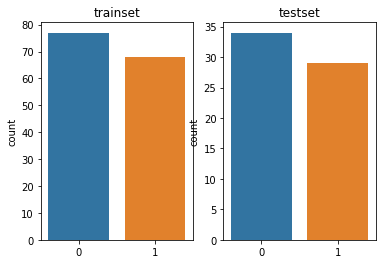

In [10]:
plt.subplot(121);sns.countplot(x=y_train);plt.title('trainset')
plt.subplot(122);sns.countplot(x=y_test);plt.title('testset')

### | 모델


<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0104-02.PNG?raw=true width=500>
</p>


#### **모델 생성**

In [11]:
from tensorflow.keras import models, layers, utils

def build_model():
  x = layers.Input(shape=(60,)) # 데이터가 주어지면 인풋의 shape는 고정
  z = layers.Dense(30, activation='relu')(x)
  y = layers.Dense(1, activation='sigmoid')(z) # 데이터가 주어지면 아웃풋의  shape는 고정 
  #( 이진분류 문제는 마지막 아웃풋 shape가 1, 마지막 활성화함수는 시그모이드 함수 )
  model = models.Model(x, y, name='sonar_classifier')
  return model

#### **모델 시각화**

* `model.summary()`
* `utils.plot_model()`

Model: "sonar_classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 60)]              0         
                                                                 
 dense (Dense)               (None, 30)                1830      
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1,861
Trainable params: 1,861
Non-trainable params: 0
_________________________________________________________________


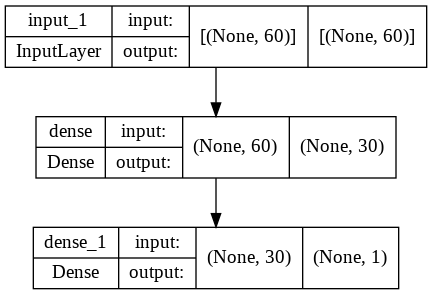

In [12]:
model = build_model()
model.summary()
utils.plot_model(model, show_shapes=True)

### | 학습

#### **모델 컴파일**

```
model.compile(loss, optimizer, metrics) 
```
* `loss` : `binary_crossentropy`
* `optimizer` : `adam`
* `metrics`: `accuracy`


In [13]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#### **학습**

```
model.fit(x_train, y_train, epochs, batch_size)
```
* `x_train` : 넘파이 혹은 텐서 형식의 인풋 데이터
* `y_train` : 넘파이 혹은 텐서 형식의 아웃풋 데이터
* `epochs` : 학습 횟수
* `batch_size` : 배치 사이즈 (업데이트 한번에 사용될 샘플 개수)

In [15]:
model.fit(x_train, y_train, epochs=100, batch_size=16)

Epoch 1/100
10/10 [==============================] - 1s 3ms/step - loss: 0.8359 - accuracy: 0.4414
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7100 - accuracy: 0.5172
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6332 - accuracy: 0.5862
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 0.5686 - accuracy: 0.6897
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 0.5245 - accuracy: 0.7172
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4894 - accuracy: 0.7241
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4627 - accuracy: 0.7517
Epoch 8/100
10/10 [==============================] - 0s 4ms/step - loss: 0.4374 - accuracy: 0.7655
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4156 - accuracy: 0.7931
Epoch 10/100
10/10 [==============================] - 0s 3ms/step - loss: 0.3970 - accuracy: 0.8000
Epoch 11/

### | 검증 및 예측


#### **검증**

```
model.evaluate(x_test, y_test)
```
* `x_test` : 넘파이 혹은 텐서 형식의 인풋 테스트 데이터
* `y_test` : 넘파이 혹은 텐서 형식의 아웃풋 테스트 데이터

In [16]:
model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 6ms/step - loss: 0.3616 - accuracy: 0.8889


[0.3615511953830719, 0.8888888955116272]

#### **예측**

```
model.predict(x_test)
```
* `x_test` : 넘파이 혹은 텐서 형식의 인풋 테스트 데이터
* `y_test` : 넘파이 혹은 텐서 형식의 아웃풋 테스트 데이터

In [20]:
y_pred = model.predict(x_test).flatten()
print(y_pred[0], y_test[0])
y_pred.shape, y_test.shape

0.7613046 1


((63,), (63,))

In [23]:
np.round(y_pred) # 반올림 (0.5 기준으로)

array([1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0.,
       1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1.], dtype=float32)

* 예측 시각화

[[29  5]
 [ 2 27]]


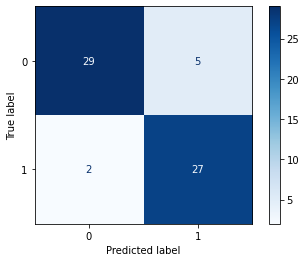

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 함수 인풋 배열은 정수가 되야 된다.
cm = confusion_matrix(y_test, np.round(y_pred))
print(cm)
ConfusionMatrixDisplay(cm).plot(cmap='Blues')

## 과제
---

### | 과제1. 이진분류 문제 정리

* 예측값의 범위 : 0 에서 1 사이의 확률 값
* 예측값의 shape : (샘플 개수, ) 혹은 (샘플 개수, 1)
* 아웃풋 레이어의 노드 개수 : 1
* 아웃풋 레이어의 activation : sigmoid
* 손실함수 (loss) : binary crossentropy
* 평가함수 (metrics) : accuracy

### | 과제2. 한 셀에 코드 정리하기

* 추가 연습
  * 모델의 깊이(depth)를 늘려가며 학습해 보세요.
  * 모델의 너비(width)를 늘려가며 학습해 보세요.

### | 과제 3. 피마 인디언 당뇨병 예측


* `pima-indians-diabetes.csv`
```
df = pd.read_csv(data_path,
                names = ["pregnant", "plasma", "pressure", "thickness", "insulin", "BMI", "pedigree", "age", "class"])
```

### | 과제 4. 생각해보기

데이터가 불균형 할 때 딥러닝에서는 어떠한 방법을 써서 이를 해결 하나요? 
